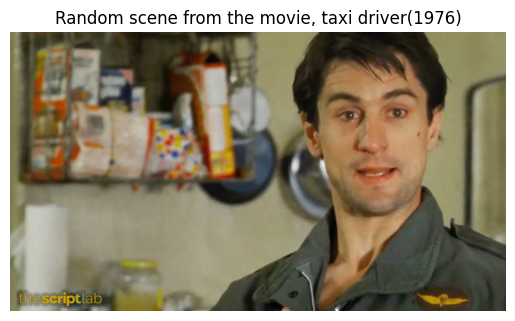

In [20]:
import numpy as np 
import matplotlib.cbook as cbook 
import matplotlib.image as image 
import matplotlib.pyplot as plt 
  
image_file = 'D:\Workspace\pallete\data\photo.jpg'
image = plt.imread(image_file) 
  
fig, ax = plt.subplots() 
ax.imshow(image) 
ax.axis('off') 
plt.title("Random scene from the movie, taxi driver(1976)")
plt.show()

In [21]:
pixels = image.reshape(-1,3) # reshaping the image to kmeans to process

# flatten the image (h, w, 3)
# then it converts to 2d array where -1 is the total no. of rows, means each row represents each pixel

Let's extract the dominent color from our image pixel.

In [22]:
from sklearn.cluster import KMeans
num_colors = 5

kmeans = KMeans(n_clusters=num_colors, random_state=42, n_init=10)
kmeans.fit(pixels)

dominant_colors = kmeans.cluster_centers_.astype(int)
print(dominant_colors)

[[ 41  36  23]
 [160 148 116]
 [ 78  72  55]
 [136 115  76]
 [182 177 164]]


Let's display color palette by iterating through the dominent colors

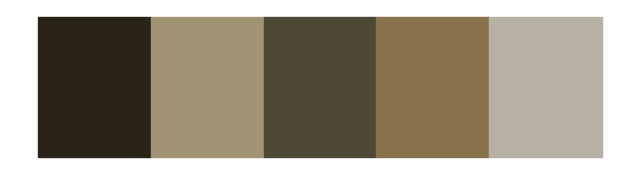

In [23]:
def plot_palette(colors):# colors -> dominant color in this code 
    plt.figure(figsize=(8, 2))
    plt.axis("off")
    for i, color in enumerate(colors):
    
        plt.fill_between([i, i + 1], 0, 1, color = np.array(color) / 255.0) #draws a rectangle for each color and converts to matplotlib format (0 -1 instead of 0-200), here 0 to 1 fills the colors in the box.
    plt.show()

plot_palette(dominant_colors)

In [28]:
for i in dominant_colors:
    hex_color = "#{:02x}{:02x}{:02x}".format(i[0], i[1], i[2])
    

    print(f"RGB: {i} → HEX value: {hex_color}")
    
    

RGB: [41 36 23] → HEX value: #292417
RGB: [160 148 116] → HEX value: #a09474
RGB: [78 72 55] → HEX value: #4e4837
RGB: [136 115  76] → HEX value: #88734c
RGB: [182 177 164] → HEX value: #b6b1a4


Now, let's display color palette along with the hex code. 


In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

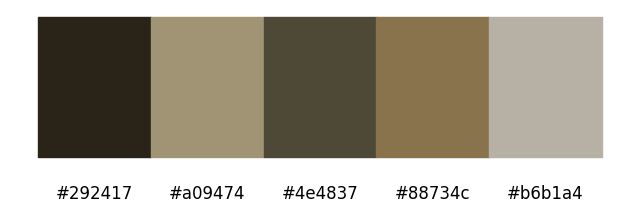

In [33]:
def plot_palette_and_hex_code(colors):
    
    ''' 
    
    Displays the color code along with 
    the pallete. 
    
    '''
    plt.figure(figsize=(8, 2))
    plt.axis("off")
    for i, color in enumerate(colors):
        plt.fill_between([i, i + 1], 0, 1, color = np.array(color) / 255.0) #draws a rectangle for each color and converts to matplotlib format (0 -1 instead of 0-200), here 0 to 1 fills the colors in the box.
        hex_color = "#{:02x}{:02x}{:02x}".format(color[0], color[1], color[2])
        plt.text(i + 0.5, -0.3, hex_color, ha='center', fontsize=12)
        plt.axis("off")
    plt.show()

plot_palette_and_hex_code(dominant_colors)

In [34]:
import gradio as gr 

demo = gr.Interface(
    fn= plot_palette_and_hex_code ,
    inputs= gr.Image(type="filepath"),
    outputs= gr.Image()
)

demo.launch()

* Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.
